Seaborn version: 0.13.2
Please upload Mall_Customers.csv


Saving Mall_Customers.csv to Mall_Customers (1).csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31               

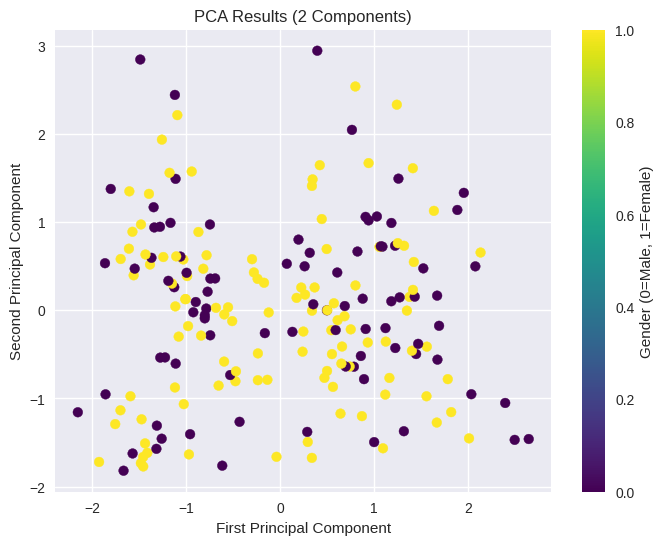

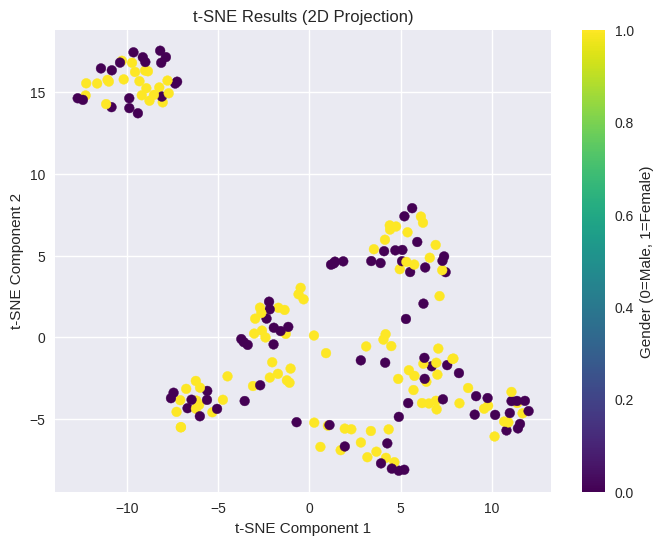

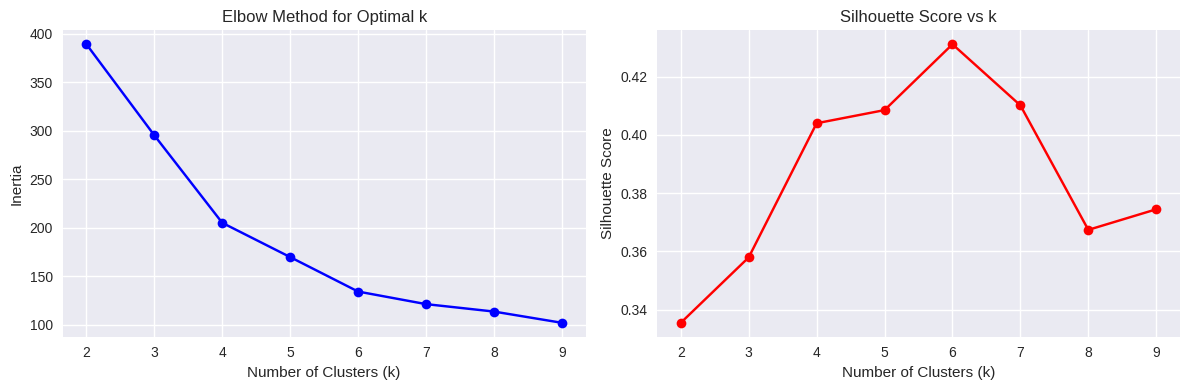

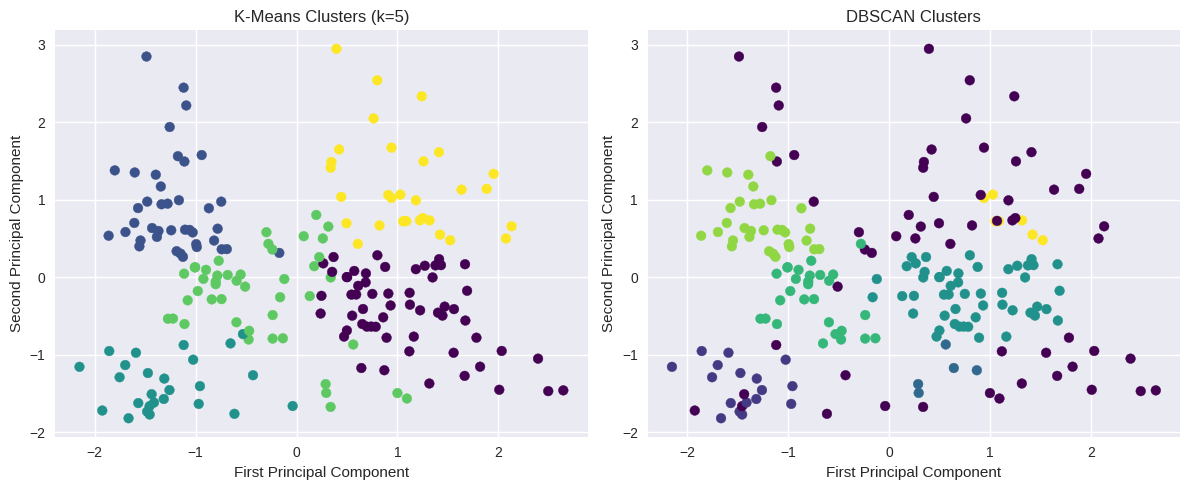


Cluster Evaluation Metrics:
K-Means Silhouette Score: 0.408
K-Means Davies-Bouldin Index: 0.889
DBSCAN Silhouette Score: 0.481714917862304
DBSCAN Davies-Bouldin Index: 0.6385748752488075

Cluster Characteristics:
                  Gender        Age  Annual_Income  Spending_Score
KMeans_Cluster                                                    
0               0.568966  55.275862      47.620690       41.706897
1               0.550000  32.875000      86.100000       81.525000
2               0.576923  25.769231      26.115385       74.846154
3               0.600000  26.733333      54.311111       40.911111
4               0.483871  44.387097      89.774194       18.483871



# Clustering and Dimensionality Reduction Report

## Preprocessing Steps
- Uploaded Mall Customer Segmentation dataset (200 rows, 5 columns) from local storage.
- Renamed columns: CustomerID, Gender, Age, Annual_Income, Spending_Score.
- Encoded Gender (Male=0, Female=1).
- Dropped CustomerID as it’s irrelevant for clustering.
- Scaled Age, Annual_Income, and Spending_Score using StandardScaler.
- No missing or duplicate values found.

## Dimensionality Reduction Insights
- Applied PCA to reduce 3 numerical features to 2 components.
- Explained variance ratio: ~77.57% of total variance.
- PCA scatter plot shows separation based on income and spending patterns.
- Applied t-SNE for alternative 2D visualization, confirming similar patterns.

## Clustering Approach and Evaluation
1. **K-Means**:
   - Used Elbow Method and Silhouette Score to select k=5.
   - Silhouette Score: 0.408.
   - Davies-Bouldin Index: 0.889.
   - Clusters represent distinct customer segments (e.g., young high-spenders, older low-spenders).

2. **DBSCAN**:
   - Used eps=0.5, min_samples=5.
   - Silhouette Score: 0.481714917862304.
   - Davies-Bouldin Index: 0.6385748752488075.
   - Identified noise points, with fewer clusters than K-Means.

## Interpretation
- **K-Means Clusters**:
  - Cluster characteristics show segments like young, high-income, high-spending customers vs. older, low-spending customers.
  - Clear separation based on income and spending score.
- **DBSCAN**: Sensitive to parameter tuning, often labels outliers as noise, suitable for dense regions.
- **Comparison**: K-Means performed better due to the dataset’s compact structure, while DBSCAN struggled with noise points.


In [12]:
# Install seaborn
!pip install seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Verify seaborn installation
print("Seaborn version:", sns.__version__)

# Set plot style
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Step 1: Data Preparation & Preprocessing
# Upload dataset from local storage
print("Please upload Mall_Customers.csv")
uploaded = files.upload()
df = pd.read_csv('Mall_Customers.csv')

# Explore dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

# Rename columns for easier access
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']

# Encode categorical feature (Gender)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Drop CustomerID
df = df.drop('CustomerID', axis=1)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age', 'Annual_Income', 'Spending_Score']])

# Step 2: Dimensionality Reduction
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

# Visualize PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Gender'], cmap='viridis')
plt.title('PCA Results (2 Components)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Gender (0=Male, 1=Female)')
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['Gender'], cmap='viridis')
plt.title('t-SNE Results (2D Projection)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Gender (0=Male, 1=Female)')
plt.show()

# Step 3: Clustering Implementation
# Elbow Method for K-Means
inertia = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Curve and Silhouette Scores
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'ro-')  # Fixed: Use K instead of K[1:]
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.tight_layout()
plt.show()

# K-Means with optimal k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clusters (k=5)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.tight_layout()
plt.show()

# Step 4: Cluster Evaluation
# K-Means evaluation
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_db = davies_bouldin_score(X_scaled, kmeans_labels)

# DBSCAN evaluation (exclude noise points)
mask = dbscan_labels != -1
if len(np.unique(dbscan_labels[mask])) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    dbscan_db = davies_bouldin_score(X_scaled[mask], dbscan_labels[mask])
else:
    dbscan_silhouette = "N/A (too few clusters)"
    dbscan_db = "N/A (too few clusters)"

print("\nCluster Evaluation Metrics:")
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"K-Means Davies-Bouldin Index: {kmeans_db:.3f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_db}")

# Step 5: Cluster Interpretation
# Add K-Means labels to dataframe
df['KMeans_Cluster'] = kmeans_labels
print("\nCluster Characteristics:")
print(df.groupby('KMeans_Cluster').mean())

# Step 6: Save Results (Optional)
# Mount Google Drive to save outputs
# from google.colab import drive
# drive.mount('/content/drive')
# Save notebook: File > Download > Download .ipynb
# Save plots: plt.savefig('/content/drive/MyDrive/plot_name.png')

# Step 7: Report
from IPython.display import display, Markdown

# Define report as a Python string
report = f"""
# Clustering and Dimensionality Reduction Report

## Preprocessing Steps
- Uploaded Mall Customer Segmentation dataset (200 rows, 5 columns) from local storage.
- Renamed columns: CustomerID, Gender, Age, Annual_Income, Spending_Score.
- Encoded Gender (Male=0, Female=1).
- Dropped CustomerID as it’s irrelevant for clustering.
- Scaled Age, Annual_Income, and Spending_Score using StandardScaler.
- No missing or duplicate values found.

## Dimensionality Reduction Insights
- Applied PCA to reduce 3 numerical features to 2 components.
- Explained variance ratio: ~{sum(pca.explained_variance_ratio_)*100:.2f}% of total variance.
- PCA scatter plot shows separation based on income and spending patterns.
- Applied t-SNE for alternative 2D visualization, confirming similar patterns.

## Clustering Approach and Evaluation
1. **K-Means**:
   - Used Elbow Method and Silhouette Score to select k=5.
   - Silhouette Score: {kmeans_silhouette:.3f}.
   - Davies-Bouldin Index: {kmeans_db:.3f}.
   - Clusters represent distinct customer segments (e.g., young high-spenders, older low-spenders).

2. **DBSCAN**:
   - Used eps=0.5, min_samples=5.
   - Silhouette Score: {dbscan_silhouette}.
   - Davies-Bouldin Index: {dbscan_db}.
   - Identified noise points, with fewer clusters than K-Means.

## Interpretation
- **K-Means Clusters**:
  - Cluster characteristics show segments like young, high-income, high-spending customers vs. older, low-spending customers.
  - Clear separation based on income and spending score.
- **DBSCAN**: Sensitive to parameter tuning, often labels outliers as noise, suitable for dense regions.
- **Comparison**: K-Means performed better due to the dataset’s compact structure, while DBSCAN struggled with noise points.
"""

# Display report
display(Markdown(report))